# Text Classification Exercises

## Exercise 1: Dataset Exploration

**Objective**: Familiarize yourself with the dataset.

1. Load the **News Category Dataset** (News_Category_Dataset_v3.json), which contains approximately 210,000 news headlines from 2012 to 2022. **Hint: read the file with Python, parse it with the json library and convert it to a pandas DataFrame.** **Note: you need to extract the file from the zip archive before loading it.**
2. Identify the target label.
3. Which features do you find relevant for the classification task?
4. Perform exploratory data analysis (EDA):
   - Check for any missing values.
   - Visualize the distribution of categories.


In [291]:
import pandas as pd
import json

from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.ensemble._forest import ForestClassifier

with open ("../../data/News_Category_Dataset_v3.json", 'r') as f:
    data = f.read()
    
json_data = [json.loads(line) for line in data.split('\n') if line] [:1000]
df = pd.DataFrame(json_data)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [292]:
df = df[['headline', 'category' , 'short_description']]
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [293]:
top10 = df['category'].value_counts().nlargest(10)
top10

category
POLITICS          272
ENTERTAINMENT     185
U.S. NEWS         174
WORLD NEWS        138
SPORTS             36
CRIME              26
ENVIRONMENT        25
CULTURE & ARTS     23
WELLNESS           16
PARENTING          15
Name: count, dtype: int64

In [294]:
top10 = top10.index

df_i = df[df['category'].isin(top10)]
df_i

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...
...,...,...,...
995,China Weighs Exit From 'Zero COVID' And The Ri...,WORLD NEWS,The change does not appear imminent as the gov...
996,Russian Missiles Hit Near Lviv Airport As Stri...,WORLD NEWS,World leaders have been calling for an investi...
997,"Syria's Assad Visits UAE, 1st Trip To Arab Cou...",WORLD NEWS,Assad's office said he met with Sheikh Mohamed...
998,"Strong Japan Earthquake Kills 4, Injures 107",WORLD NEWS,The 7.4-magnitude temblor knocked out power an...


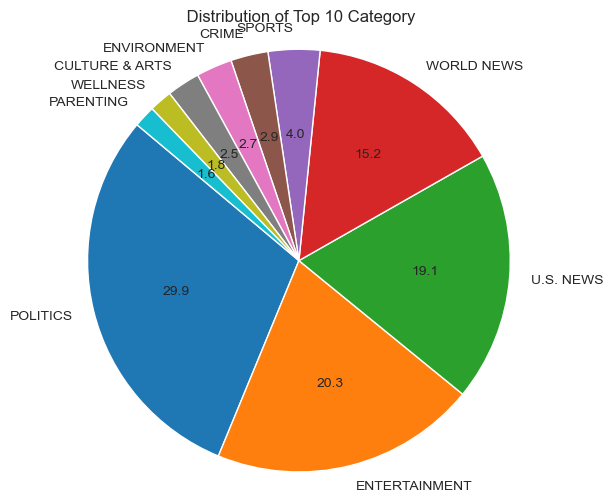

In [295]:
import matplotlib.pyplot as plt
category_counts = df_i['category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f', startangle=140)
plt.title(" Distribution of Top 10 Category")
plt.axis('equal')
plt.show()

## Exercise 2: Text Preprocessing

**Objective**: Prepare the text data for classification tasks.

1. Preprocess the "headline" and "short_description" fields by performing the following steps:
   - Convert all text to lowercase.
   - Remove punctuation, digits, and any other irrelevant characters.
   - Remove stop words.
   - Apply either stemming or lemmatization.
2. Observe how the data changes at each step of preprocessing.
3. Create a new column that concatenates the processed "headline" and "short_description" fields.

In [296]:
import re 
import string 
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet') 

def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r"http\S+", ' ', text) 
    text = re.sub(r"\d" , " " , text) 
    punctuations = string.punctuation 
    text = text.replace(punctuations, " ") #remove a pontuação 
    text = re.sub(r"\W", " " , text) # remove as palavras não alfabeticas
    return " ".join(text.split()) 

def eliminate_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    for word in words: 
        if word  in stop_words:
            words.remove(word)
    return " ".join(words)

def apply_stemming(text):
    stemer = PorterStemmer()
    words = text.split()
    words = [stemer.stem(word) for word in words]
    return " ".join(words)

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

def preprocess_and_clean(text: str):
    text = preprocess_text(text)
    text = eliminate_stop_words(text)
    text = apply_stemming(text)
    
    return text
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatrizdias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beatrizdias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [297]:
print(df_i.iloc[0]['headline'])

Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters


In [298]:
iter1 = preprocess_text(df_i.iloc[0]['headline'])
iter1

'over million americans roll up sleeves for omicron targeted covid boosters'

In [299]:
iter2 = eliminate_stop_words(iter1)
iter2

'million americans roll sleeves omicron targeted covid boosters'

In [300]:
iter3 = apply_stemming(iter2)
iter3

'million american roll sleev omicron target covid booster'

In [301]:
iter4 = apply_lemmatization(iter2)
iter4

'million american roll sleeve omicron targeted covid booster'

In [302]:
df_i['text'] = df_i['headline'] + df_i['short_description']

df_i['prepocessed_text'] = df_i['text'].apply(preprocess_and_clean)

data = df_i[['prepocessed_text', 'category']]
data.head()

/var/folders/26/7s9y6vdj3xs20whynm5xn0500000gn/T/ipykernel_4557/362540386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['text'] = df_i['headline'] + df_i['short_description']
/var/folders/26/7s9y6vdj3xs20whynm5xn0500000gn/T/ipykernel_4557/362540386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['prepocessed_text'] = df_i['text'].apply(preprocess_and_clean)


,prepocessed_text,category
0,million american roll sleev omicron target cov...,U.S. NEWS
1,american airlin flyer charg ban life punch fli...,U.S. NEWS
3,funniest tweet parent week sept accident put g...,PARENTING
4,woman call cop black bird watcher lose lawsuit...,U.S. NEWS
5,cleaner dead belk bathroom day bodi found poli...,U.S. NEWS


## Exercise 3: Data Splitting

**Objective**: Split the dataset into training and testing sets.

1. Divide the data into **training** and **testing** sets.
   - Use an appropriate train-test split ratio (e.g., 80-20 or 70-30).
   - Ensure the split is **stratified** to maintain the distribution of categories.
   

In [310]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['category'])
train.shape, test.shape 

((728, 2), (182, 2))

In [311]:
train.head()

,prepocessed_text,category
811,suprem court reviv fight paint stolen nazisth ...,U.S. NEWS
982,batman still cross million batman still go str...,ENTERTAINMENT
386,punk band respond former oath keeper wear shir...,U.S. NEWS
730,lawyer roe call overturn law giant step backwa...,POLITICS
876,ohio fairground turn upcom trump polit rallyth...,POLITICS


In [312]:
x_train = train['prepocessed_text']
y_train = train['category']
x_text = test['prepocessed_text']
y_text = test['category']

## Exercise 4: Feature Extraction

**Objective**: Convert the text data into numerical features.

1. Apply one of the following feature extraction techniques:
   - **Bag-of-Words (BoW)**
   - **TF-IDF**
   - Optionally, apply N-grams (unigrams, bigrams, etc.) before feature extraction.
2. Use either the **sklearn** or **nltk** packages for feature extraction.

In [313]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500)

x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_text)

x_train_bow.shape, x_test_bow.shape

((728, 500), (182, 500))

## Exercise 5: Clustering

**Objective**: Cluster news articles based on their content.

1. Apply KMeans clustering to group news articles into 42 clusters.
2. Visualize the clusters using PCA or t-SNE.

In [314]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(x_train_bow)

In [316]:
kmeans.labels_[:10]


array([7, 2, 3, 3, 7, 3, 3, 7, 7, 7], dtype=int32)

In [317]:
y_train[:10]

811         U.S. NEWS
982     ENTERTAINMENT
386         U.S. NEWS
730          POLITICS
876          POLITICS
307       ENVIRONMENT
580    CULTURE & ARTS
148          POLITICS
550     ENTERTAINMENT
699          POLITICS
Name: category, dtype: object

In [320]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train_bow)
X_reduced

array([[-0.65901009, -0.23392999],
       [ 1.39020093, -0.24496951],
       [ 0.37995826,  0.16403151],
       ...,
       [-0.75871215, -0.12585613],
       [ 1.36197995, -0.13083642],
       [ 1.26227882, -0.2257048 ]])

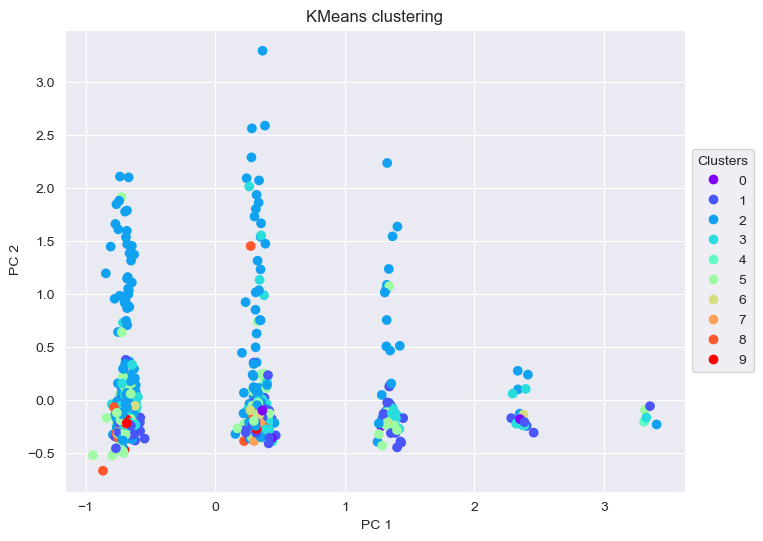

In [327]:
color_map = {cat: i for i, cat in enumerate(set(y_train))}
colors = y_train.map(color_map)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, cmap="rainbow", label = y_train)
plt.title('KMeans clustering')
plt.xlabel(" PC 1")
plt.ylabel(" PC 2")

plt.legend(*scatter.legend_elements(), loc="center left", bbox_to_anchor=(1, 0.5), title = "Clusters")
plt.show()

## Exercise 6: Model Training

**Objective**: Train machine learning models for text classification.

1. Train various machine learning models on the preprocessed and vectorized data.
   - Choose models from the **sklearn** library (e.g., Logistic Regression, Random Forest, SVM).
   

In [329]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=123).fit(x_train_bow, y_train)


In [330]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123).fit(x_train_bow, y_train)

## Exercise 7: Model Evaluation

**Objective**: Evaluate the performance of the trained models.

1. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and F1-score.
2. Perform **cross-validation** on at least one model to ensure reliable performance evaluation.


In [333]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = model.predict(x_test_bow)
acc = accuracy_score(y_text, y_pred_lr)
precision = precision_score(y_text, y_pred_lr, average="weighted")
recall = recall_score(y_text, y_pred_lr, average="weighted")
f1 = f1_score(y_text, y_pred_lr, average="weighted")

acc, precision, recall, f1


/Users/beatrizdias/anaconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.6208791208791209, 0.6098691672529349, 0.6208791208791209, 0.60319478253255)

In [334]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_rf = rf.predict(x_test_bow)
acc = accuracy_score(y_text, y_pred_rf)
precision = precision_score(y_text, y_pred_rf, average="weighted")
recall = recall_score(y_text, y_pred_rf, average="weighted")
f1 = f1_score(y_text, y_pred_rf, average="weighted")

acc, precision, recall, f1

/Users/beatrizdias/anaconda3/envs/tac-hands-on/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5879120879120879,
 0.5753267784846732,
 0.5879120879120879,
 0.5711820913562569)

In [335]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, x_train_bow, y_train, cv=3))

[0.62962963 0.57613169 0.59090909]


In [ ]:
from sklearn
model = RadomForestClassifier(random_state=123)